In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\user\\Documents\\100 Days of ML Coding\\Project - Spooky Author Identification\\train.csv")
data.shape

(19579, 3)

In [3]:
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
data["author"].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

# Feature Engineering
- Remove puntuations
- Extract stop words (common words)
- Stemming to extract root form of the words
- Collect vocab count

In [5]:
# Without functions doesnt work
import string
def remove_punc(text):
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)

data['text'] = data['text'].apply(remove_punc)
data.head()

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL


In [6]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
print(len(sw))
np.array(sw)

179


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [7]:
def remove_sw(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

data['text'] = data['text'].apply(remove_sw)
data.head()

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL


In [8]:
# To illustrate how does split works in a column
for w in data['text'].iloc[0].split():
    print(w)

process
however
afforded
means
ascertaining
dimensions
dungeon
might
make
circuit
return
point
whence
set
without
aware
fact
perfectly
uniform
seemed
wall


In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def remove_stem(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

data['text'] = data['text'].apply(remove_stem)
data.head()

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer("english")
tf_vectorizer.fit(data['text'])
dictionary = tf_vectorizer.vocabulary_.items()
# To show the first five keys
list(dictionary)[:5]

[('process', 10263),
 ('howev', 6341),
 ('afford', 218),
 ('mean', 8122),
 ('ascertain', 770)]

In [11]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
data_stem = pd.Series(count, index=vocab)
data_stem = data_stem.sort_values(ascending=False)
data_stem.head()

υπνος       15141
οἶδα        15140
émeut       15139
élite       15138
æschylus    15137
dtype: int64

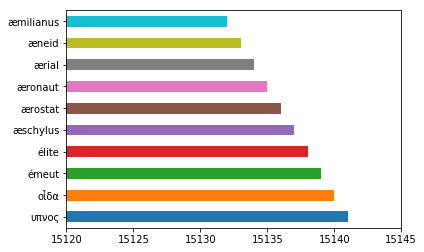

In [12]:
top_data_stem = data_stem.head(10)
top_data_stem.plot(kind = 'barh', xlim= (15120, 15145))

In [13]:
data_EAP = data[data['author']=='EAP']
data_HPL = data[data['author']=='HPL']
data_MWS = data[data['author']=='MWS']

In [14]:
def top_words(author):
    tf_vectorizer = TfidfVectorizer("english")
    exec('data_author = data_{}.copy()'.format(author))
    #exec('data_{} = pd.DataFrame()'.format(c))
    print(data_EAP.head())
top_words("EAP")

        id                                               text author
0  id26305  process howev afford mean ascertain dimens dun...    EAP
2  id11008  left hand gold snuff box caper hill cut manner...    EAP
6  id09674  astronom perhap point took refug suggest non l...    EAP
7  id13515                          surcingl hung riband bodi    EAP
8  id19322  knew could say stereotomi without brought thin...    EAP


In [15]:
def top_words(author):
    tf_vectorizer = TfidfVectorizer("english")
    data_author = data[data['author']=='{}'.format(author)]
    tf_vectorizer.fit(data_author['text'])
    dictionary = tf_vectorizer.vocabulary_.items()
    vocab = []
    count = []
    for key, value in dictionary:
        vocab.append(key)
        count.append(value)
    data_stem = pd.Series(count, index=vocab)
    data_stem = data_stem.sort_values(ascending=False)
    print(data_stem.head())

In [16]:
top_words("EAP")

émeut       9730
élite       9729
æschylus    9728
ærostat     9727
æronaut     9726
dtype: int64


In [17]:
top_words("HPL")

υπνος        9324
οἶδα         9323
æneid        9322
æmilianus    9321
ægyptus      9320
dtype: int64


In [18]:
top_words("MWS")

zest         7039
zeal         7038
zaimi        7037
youth        7036
youngster    7035
dtype: int64


### Top words of each writers are distinctive  >>> TF-IDF
### TF-IDF Extraction
- normalized Term Frequency (TF) / total number of words
- Inverse Document Frequency (IDF) log(# doc) / # of doc

### Train, test split >>> Naive Bayes

In [19]:
tf_vectorizer = TfidfVectorizer("english")
tf_vectorizer.fit(data['text'])
tfid_matrix = tf_vectorizer.transform(data['text'])
array = tfid_matrix.todense()
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15132,15133,15134,15135,15136,15137,15138,15139,15140,15141
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df['output'] = data['author']
df['id'] = data['id']

features = df.columns.tolist()
output = 'output'
# removing the output and the id from features
features.remove(output)
features.remove('id')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[output], test_size=0.2, random_state=None)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15663, 15142)
(3916, 15142)
(15663,)
(3916,)


In [44]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [24]:
# Tuning for Multinomial Naive Bayes - alpha list
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [25]:
parameter_grid = [{"alpha":alpha_list1}]
classifier1 = MultinomialNB()

grid_search = GridSearchCV(classifier1, parameter_grid, n_jobs=-1, 
                           scoring = 'neg_log_loss', cv = 4)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [26]:
results1 = pd.DataFrame()
results1['alpha'] = grid_search.cv_results_['param_alpha'].data
results1['neglogloss'] = grid_search.cv_results_['mean_test_score'].data

print("Best parameter: ",grid_search.best_params_)
print("Best score: ",grid_search.best_score_) 

Best parameter:  {'alpha': 0.0208}
Best score:  -0.4571511373990046


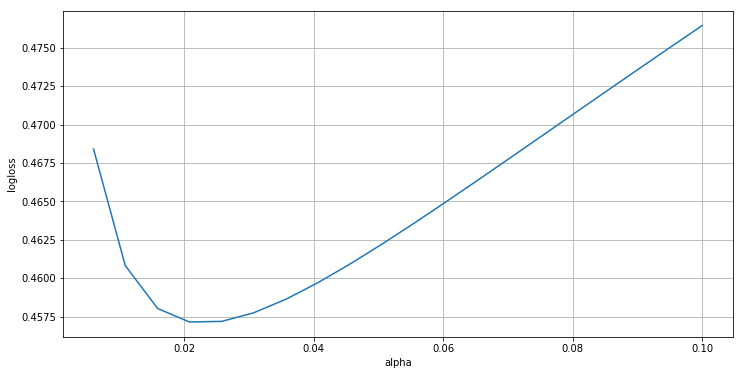

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [32]:
clf = MultinomialNB(alpha=0.0208)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         EAP       0.82      0.83      0.82      1571
         HPL       0.86      0.81      0.83      1145
         MWS       0.81      0.84      0.83      1200

    accuracy                           0.83      3916
   macro avg       0.83      0.83      0.83      3916
weighted avg       0.83      0.83      0.83      3916



In [46]:
print(confusion_matrix(y_test, y_pred))

[[1298   99  174]
 [ 154  926   65]
 [ 133   53 1014]]


In [47]:
print(accuracy_score(y_test, y_pred))

0.8268641470888662
